# Water Quality Analysis using Python

1. [Water - a Hugging Face Space by btulftma](https://huggingface.co/spaces/btulftma/water)
2. [Water Quality Analysis | Aman Kharwal](https://thecleverprogrammer.com/2021/08/19/water-quality-analysis/)
3. [Water Quality Analysis Github ](https://github.com/FBetulS/water_analysi/tree/main)

# Su Kalitesi Analizi ve Tahmin Modelim

Bu projede, suyun içilebilirliğini (potability) tahmin eden bir makine öğrenmesi modeli geliştireceğim. Adım adım ilerleyerek:

### Adım 1: Veri Setimi Yükleyip Analiz Edeceğim

Öncelikle ihtiyaç duyduğum veri setini yükleyeceğim. Veri setini yükledikten sonra, verinin genel görünümünü ve temel istatistiklerini inceleyeceğim.

### Adım 2: Görselleştirmeler Yapacağım

Veri setimi daha iyi anlamak için çeşitli görselleştirmeler yapacağım. Sınıf dağılımı ve özelliklerin dağılımı gibi grafikler oluşturacağım.

### Adım 3: Makine Öğrenmesi Modelimi Eğiteceğim

Veri setimi analiz ettikten sonra, modelimi eğitmek için makine öğrenmesi algoritmalarını kullanacağım. Örneğin, karar ağaçları veya rastgele orman gibi yöntemleri tercih edeceğim.

### Adım 4: Modelimi Bir Streamlit Uygulaması Haline Getireceğim

Eğittiğim modeli bir web uygulaması haline getirerek, kullanıcıların su kalitesini tahmin edebilmesini sağlayacağım.

### Adım 5: Hugging Face'e Deploy Edeceğim

Son olarak, geliştirdiğim Streamlit uygulamasını Hugging Face üzerinde yayınlayarak, erişilebilir hale getireceğim.

## Veri Setinin Yüklenmesi ve Ön İşleme

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [5]:
data = pd.read_csv("water.csv")

In [6]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


| Sütun Adı           | Açıklama                                                                 |
|---------------------|-------------------------------------------------------------------------|
| **pH**              | Suyun asidik veya bazik olduğunu belirten pH değeri.                   |
| **Hardness**        | Su sertliği, genellikle kalsiyum ve magnezyum içeriğini ifade eder.    |
| **Solids**          | Suda bulunan katı madde miktarı (mg/L cinsinden).                      |
| **Chloramines**     | Suda bulunan kloramin düzeyi, dezenfeksiyon için kullanılan bir bileşiktir. |
| **Sulfate**         | Suda bulunan sülfat miktarı (mg/L cinsinden).                          |
| **Conductivity**    | Suyun elektrik iletkenliği, genellikle suyun saflığı hakkında bilgi verir. |
| **Organic_carbon**  | Suda bulunan organik karbon miktarı, suyun kirlenme düzeyini gösterir. |
| **Trihalomethanes** | Suda bulunan trihalomethan düzeyi, genellikle klorlama işlemi sonrası oluşur. |
| **Turbidity**       | Suyun bulanıklık seviyesi, genellikle askıda katı madde miktarını gösterir. |
| **Potability**      | Suyun içilebilir olup olmadığını belirten sınıf (0: içilemez, 1: içilebilir). |

In [8]:
data.shape

(3276, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
for col in data.columns:
    data[col].fillna(data[col].median(), inplace=True)

## Veri Analizi ve Görselleştirme

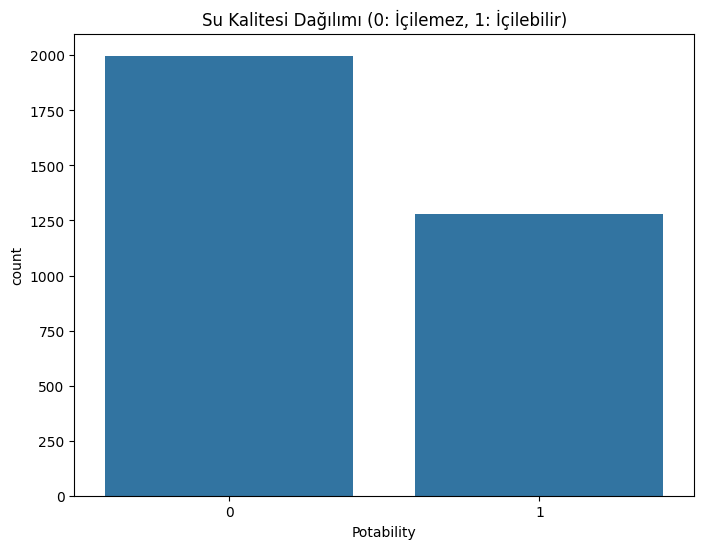

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='Potability', data=data)
plt.title("Su Kalitesi Dağılımı (0: İçilemez, 1: İçilebilir)")
plt.show()

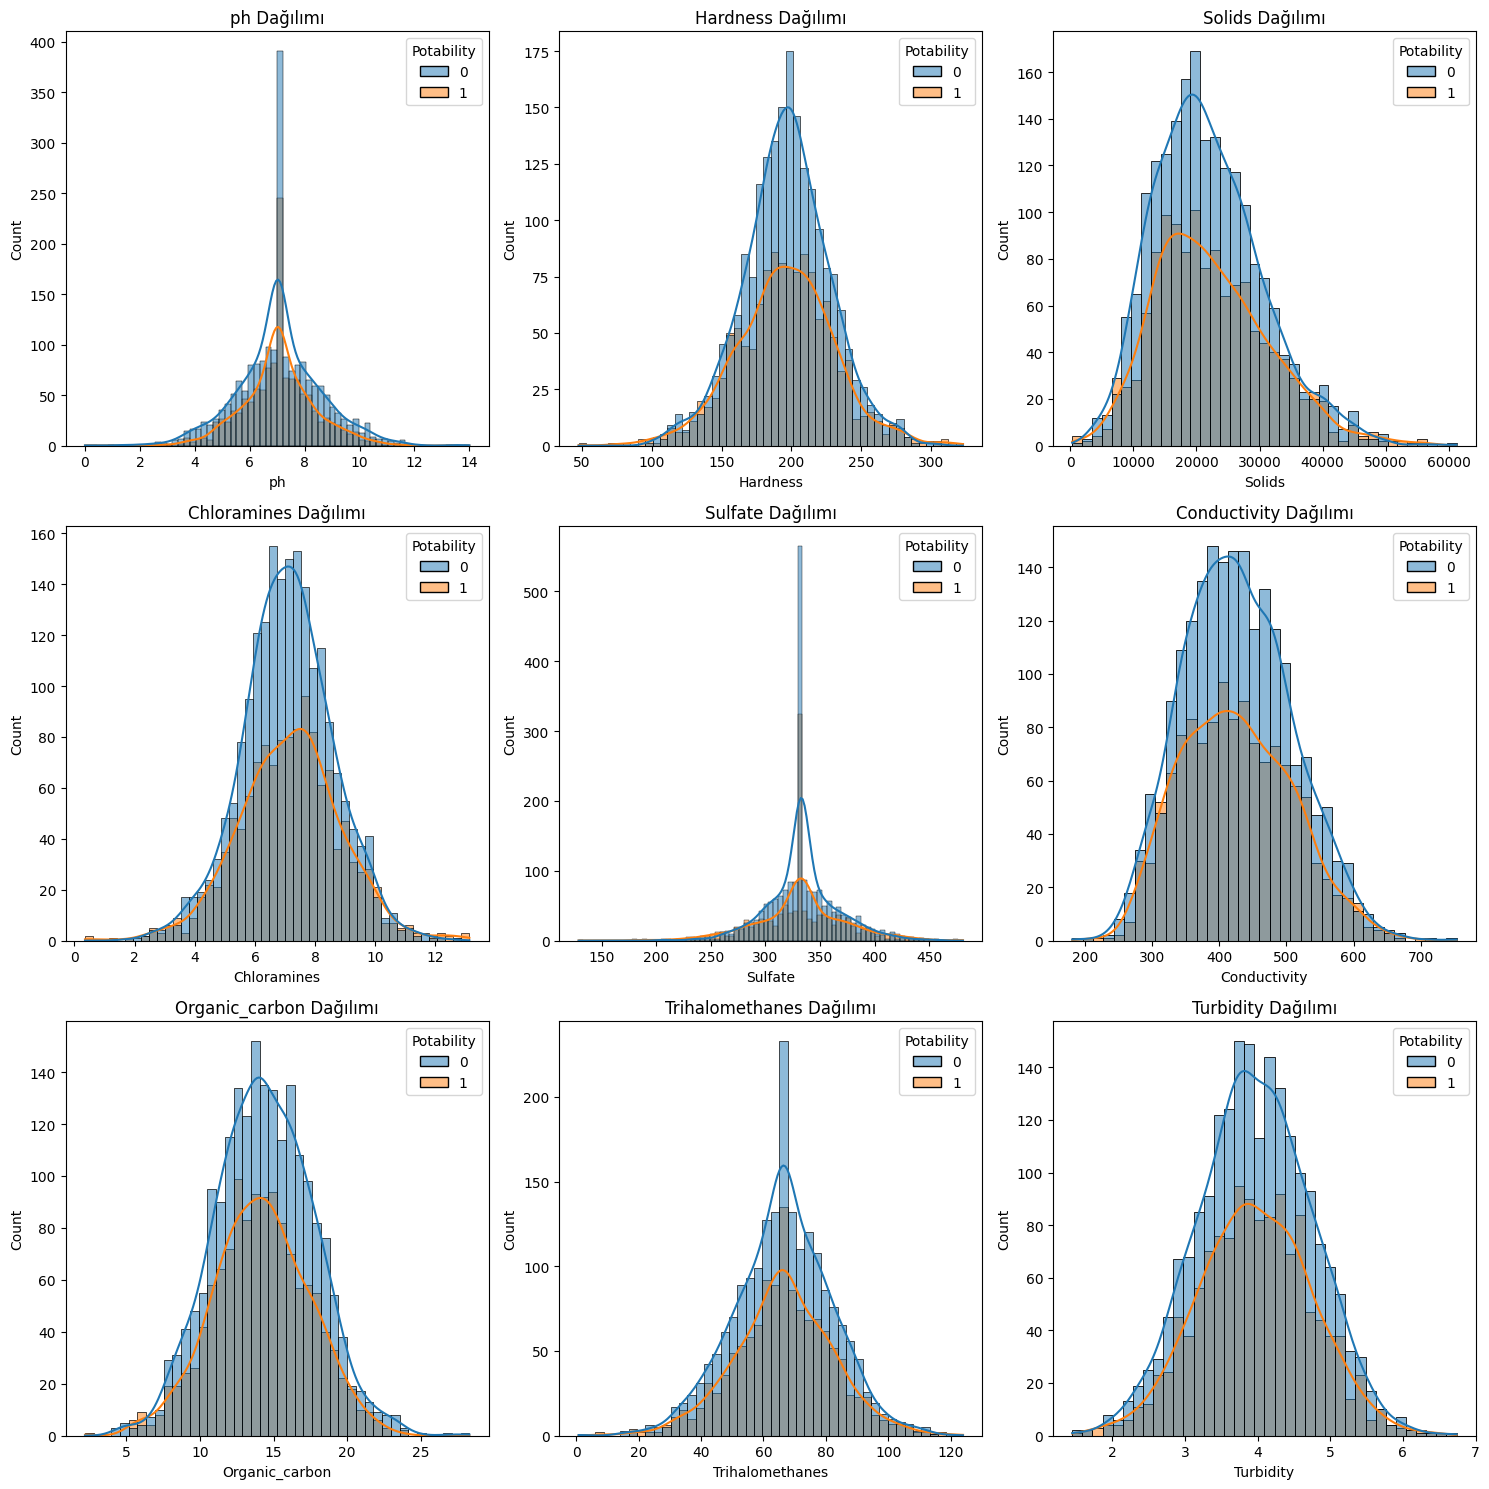

In [15]:
# Özelliklerin dağılımı
features = data.columns[:-1]
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=feature, hue='Potability', kde=True)
    plt.title(f"{feature} Dağılımı")
plt.tight_layout()
plt.show()

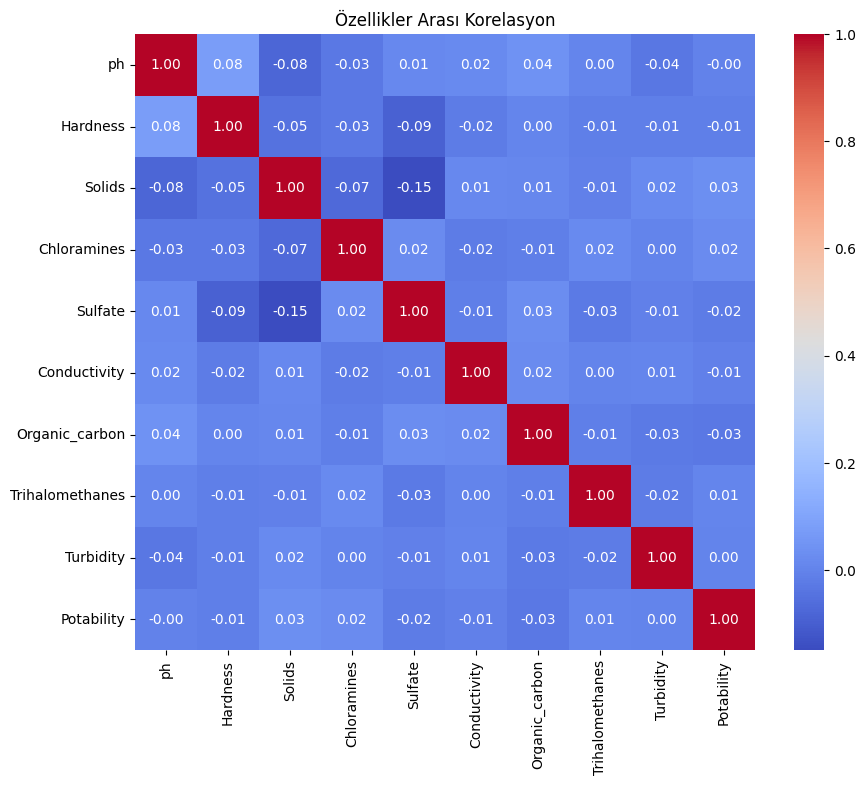

In [16]:
# Korelasyon matrisi
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Özellikler Arası Korelasyon")
plt.show()

In [17]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.075760
Organic_carbon     0.040240
Conductivity       0.017466
Sulfate            0.014178
Trihalomethanes    0.003145
Potability        -0.003014
Chloramines       -0.031741
Turbidity         -0.036107
Solids            -0.082004
Name: ph, dtype: float64

## Model Eğitimi

In [19]:
X = data.drop('Potability', axis=1)
y = data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)

# Model performansı
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Skoru: 0.6737804878048781

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



## Modeli kaydetme

In [23]:
# Modeli kaydetme
joblib.dump(model, 'water_quality_model.pkl')

['water_quality_model.pkl']

## Sonuç ve Değerlendirme

Bu projede su kalitesi analizi için bir makine öğrenmesi modeli geliştirdik ve bir web uygulaması haline getirerek Hugging Face üzerinde yayınladık. Modelimiz, su örneklerinin içilebilir olup olmadığını %67 doğrulukla tahmin edebiliyor.

### Model İyileştirme Denemeleri

Model iyileştirme için yukarıda belirtilen adımları denedik, ancak sonuçların aynı kaldığını gözlemledik. Bu durum, modelin mevcut veri seti ve özellikleri ile sınırlı olduğunu gösteriyor. Gelecekte, daha kapsamlı veri analizleri ve farklı özellik mühendisliği yöntemleri ile modelin performansını artırmayı hedefleyeceğiz.